# Image classification using OpenCV

In this notebook, we use two folder  from dataset each has images of lemon and watermelon respectively.After reading the images we take the meanvalue of images

In [1]:
import  os
import cv2
from matplotlib import pyplot as plt
import numpy as np

x=[]


basepath='D:\python workshop\dataset'
for folder in os.scandir(basepath):
    if folder.is_dir():
        for file in os.scandir(folder.path):
            img=cv2.imread(file.path)
            features=np.mean(img,axis=(0,1)).tolist()
            features.append(folder.name)
            x.append(features)
            
print(x)

            
       
            

[[155.2701126939353, 234.1465741565344, 248.6433490953309, 'lemon'], [156.06314952806756, 212.76641828117238, 236.24983606557376, 'lemon'], [184.4271012345679, 229.52857283950618, 245.1534024691358, 'lemon'], [169.45627391581633, 235.74158960459184, 251.2676777742347, 'lemon'], [168.22522469135802, 226.41436049382716, 241.0494024691358, 'lemon'], [192.3597247488729, 231.5743296685913, 245.9088032903583, 'lemon'], [131.45990706541164, 230.16974462846022, 240.75771476230193, 'lemon'], [105.35812393315072, 208.032154340836, 237.78583621134533, 'lemon'], [105.98680221152131, 204.40241364960465, 222.95249985137625, 'lemon'], [131.264612345679, 210.3206913580247, 230.39537777777778, 'lemon'], [53.98293541666666, 168.22884027777778, 211.54073125, 'lemon'], [14.355434173669467, 102.93752100840337, 132.5859943977591, 'lemon'], [29.055630165289255, 96.0725464876033, 58.70599173553719, 'watermelon'], [91.82216351338104, 128.55235173022254, 122.9239564748554, 'watermelon'], [119.84979932926494, 13

### Converting mean value of images into csv file

In [2]:
import pandas as pd
df= pd.DataFrame(x,columns=['R','G','B','class'])
print(df)
df.to_csv('curdata.csv',index =False)

             R           G           B       class
0   155.270113  234.146574  248.643349       lemon
1   156.063150  212.766418  236.249836       lemon
2   184.427101  229.528573  245.153402       lemon
3   169.456274  235.741590  251.267678       lemon
4   168.225225  226.414360  241.049402       lemon
5   192.359725  231.574330  245.908803       lemon
6   131.459907  230.169745  240.757715       lemon
7   105.358124  208.032154  237.785836       lemon
8   105.986802  204.402414  222.952500       lemon
9   131.264612  210.320691  230.395378       lemon
10   53.982935  168.228840  211.540731       lemon
11   14.355434  102.937521  132.585994       lemon
12   29.055630   96.072546   58.705992  watermelon
13   91.822164  128.552352  122.923956  watermelon
14  119.849799  130.721526  144.617063  watermelon
15   78.284543  101.294538  175.119309  watermelon
16  163.810889  178.867601  213.465256  watermelon
17   93.054747  143.496837  118.452435  watermelon
18   44.708415  104.288063  106

### Reading a csv file

In [3]:
df=pd.read_csv('curdata.csv')
print(df)

lx=df[df['class']=='lemon']
mx=df[df['class']=='watermelon']

print(lx)
print(mx)


             R           G           B       class
0   155.270113  234.146574  248.643349       lemon
1   156.063150  212.766418  236.249836       lemon
2   184.427101  229.528573  245.153402       lemon
3   169.456274  235.741590  251.267678       lemon
4   168.225225  226.414360  241.049402       lemon
5   192.359725  231.574330  245.908803       lemon
6   131.459907  230.169745  240.757715       lemon
7   105.358124  208.032154  237.785836       lemon
8   105.986802  204.402414  222.952500       lemon
9   131.264612  210.320691  230.395378       lemon
10   53.982935  168.228840  211.540731       lemon
11   14.355434  102.937521  132.585994       lemon
12   29.055630   96.072546   58.705992  watermelon
13   91.822164  128.552352  122.923956  watermelon
14  119.849799  130.721526  144.617063  watermelon
15   78.284543  101.294538  175.119309  watermelon
16  163.810889  178.867601  213.465256  watermelon
17   93.054747  143.496837  118.452435  watermelon
18   44.708415  104.288063  106

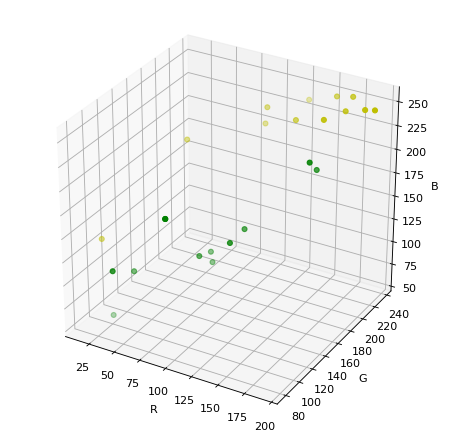

In [4]:
from mpl_toolkits import mplot3d
%matplotlib inline

plt.figure(figsize=(7,7),dpi=80,facecolor='w',edgecolor='k')
ax=plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lx['R'],lx['G'],lx['B'],color='y')
ax.scatter3D(mx['R'],mx['G'],mx['B'],color='g')




### spliting data into x and y

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[155.27011269 234.14657416 248.6433491 ]
 [156.06314953 212.76641828 236.24983607]
 [184.42710123 229.52857284 245.15340247]
 [169.45627392 235.7415896  251.26767777]
 [168.22522469 226.41436049 241.04940247]
 [192.35972475 231.57432967 245.90880329]
 [131.45990707 230.16974463 240.75771476]
 [105.35812393 208.03215434 237.78583621]
 [105.98680221 204.40241365 222.95249985]
 [131.26461235 210.32069136 230.39537778]
 [ 53.98293542 168.22884028 211.54073125]
 [ 14.35543417 102.93752101 132.5859944 ]
 [ 29.05563017  96.07254649  58.70599174]
 [ 91.82216351 128.55235173 122.92395647]
 [119.84979933 130.72152583 144.61706251]
 [ 78.28454321 101.29453827 175.11930864]
 [163.81088922 178.8676006  213.46525584]
 [ 93.05474656 143.49683695 118.45243495]
 [ 44.7084146  104.28806273 106.6730088 ]
 [ 95.4082364  142.2286515  108.71273218]
 [121.13540741 150.1631746  147.63291005]
 [163.51669048 190.61286417 198.80499325]
 [ 42.28751964  78.80749293 122.41765368]
 [ 78.24664    101.234608   175.16

### Preprocessing using LabelEncoder

In [6]:
le=preprocessing.LabelEncoder()
y=le.fit(y).transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.4,random_state=42)

## svm model

  predicting accurancy of  model

In [8]:

from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

pred = svc.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,pred)
accuracy

0.9

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix =  confusion_matrix(y_test,pred)

print(confusion_matrix)
print(classification_report(y_test,pred))

[[5 1]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



enter image path : C:\Users\user\Documents\img.jpg
it is a lemon


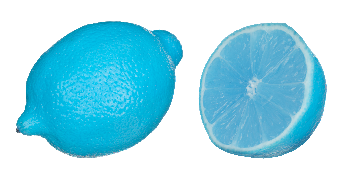

In [15]:
from PIL import Image
image=input('enter image path : ')
img=cv2.imread(image)
features=np.mean(img,axis=(0,1)).tolist()
yp=svc.predict([features])
yp=le.inverse_transform(yp)
print('it is a ' +yp[0])
plt.axis('off')
plt.imshow(img)
plt.show()
      
                   